### **MNIST HandWritten Digit Classification Using the Deep Learning(Neural Network)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow #it present in cv2,but google colab dosent have
from PIL import Image

In [ ]:
import tensorflow as tf
tf.random.set_seed(3) #Training the neural network ,the  value will be same

from tensorflow.keras.datasets import mnist
from tensorflow.math import confusion_matrix




In [ ]:
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras import datasets

from tensorflow.keras.losses import SparseCategoricalCrossentropy

from matplotlib import pyplot as plt
from tensorflow.keras.utils import plot_model



## Getting MNIST Data

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

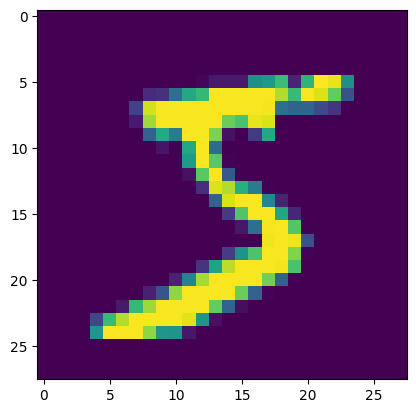

In [ ]:
plt.imshow(X_train[0])
plt.show()

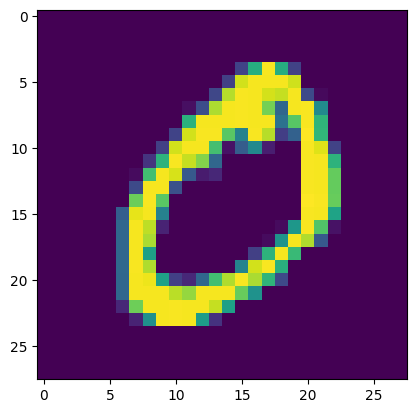

In [ ]:
plt.imshow(X_train[1])
plt.show()

In [ ]:
28*28

784

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
#Shape of the numpy arrays
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


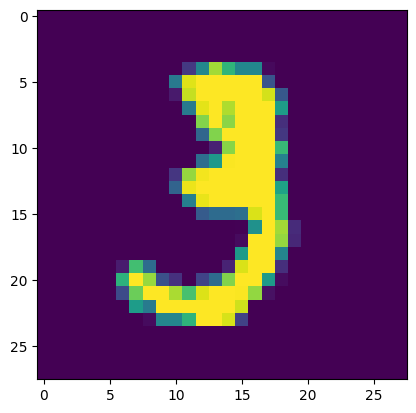

In [ ]:
plt.imshow(X_train[10])
plt.show()

In [ ]:
28*28

784

### **Using the MLP**

In [ ]:
model = Sequential()
model.add(Flatten())
model.add(Dense(500,activation = 'relu',input_dim = 784))
model.add(Dense(300,activation = 'relu'))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(10,activation ='softmax'))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs =10,batch_size = 32)

Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 0.8099 - accuracy: 0.8953
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2113 - accuracy: 0.9448
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1575 - accuracy: 0.9563
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1387 - accuracy: 0.9618
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1114 - accuracy: 0.9703
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1013 - accuracy: 0.9735
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0914 - accuracy: 0.9770
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0826 - accuracy: 0.9797
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0734 - accuracy: 0.9817
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0

### **Convolution Neural Network**

In [ ]:
cnn_model = Sequential()

In [ ]:
## add Convutional Layer

In [ ]:
#Conv2D (filters,kernel_size ,strides,activation ,input_shape, padding)

## 6 Convolutionl Filter will Extract the Features
###Each filter will Extract the one Feature

### (5,5) of the filter(kernai_size) is we have used
## input_shape = (28,28,1), ## 1-> is the grayscale
cnn_model.add(Conv2D(6 ,kernel_size = (5,5),strides = (1,1),
                     activation = 'relu',
                     input_shape = (28,28,1),
                     padding = 'valid'))

##The output size =>> ((28 - 5 +1),(28-5+1))#
#---> The output size is (24X24X6) ,6->becaues of the filters
#PAdding is valid means we are not using the padding here

In [ ]:
#Pooling Layers
cnn_model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2),padding = 'valid'))

In [ ]:
###Adding One More Conv and MAxpool
## here,padding = 'same ' means we are padding
cnn_model.add(Conv2D(5,kernel_size = (3,3),strides = (1,1),activation = 'relu',padding = 'same'))

cnn_model.add(
    MaxPooling2D(pool_size = (2,2),strides = (2,2),padding = 'valid')
)

In [ ]:
#Flatten -> now this will flatten the given all input
cnn_model.add(Flatten())

In [ ]:
##Dense Layer---> add the feed formal network
cnn_model.add(Dense(80,activation = 'relu'))
cnn_model.add(Dense(10,activation='softmax'))
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
cnn_model.fit(X_train,y_train,epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.9555 - accuracy: 0.8736
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1347 - accuracy: 0.9591
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0935 - accuracy: 0.9717
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0729 - accuracy: 0.9766
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0595 - accuracy: 0.9818
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0542 - accuracy: 0.9830
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0494 - accuracy: 0.9842
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0437 - accuracy: 0.9858
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0402 - accuracy: 0.9874
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.040

In [ ]:
cnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 5)         275       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 5)           0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 180)               0         
                                                                 
 dense_19 (Dense)            (None, 80)               

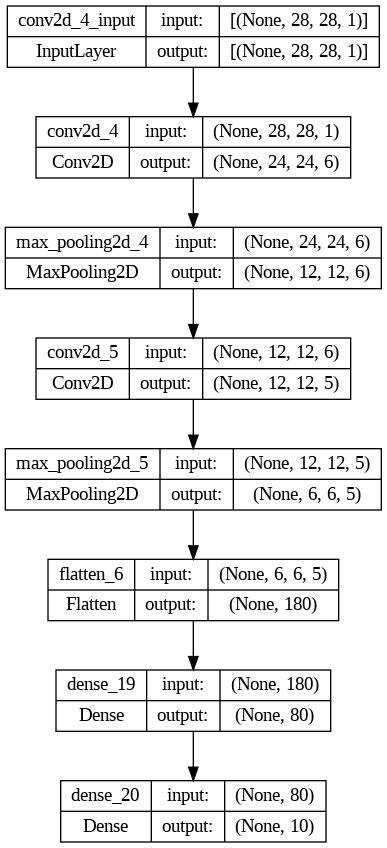

In [ ]:
##Plot the model
plot_model(cnn_model,show_shapes = True,show_layer_names = True)

In [ ]:
############################################################

## **Now we try with the MLP**

## Getting MNIST Data

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
##Priniting the 10th image
X_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18, 232, 254,
        254, 254, 254, 254, 238,  70,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 104, 244,
        254, 224, 254, 254, 254, 141,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 207,
        254, 210, 254, 254, 254,  34,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  84,
        206, 254, 254, 254, 254,  41,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         24, 209, 254, 254, 254, 171,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  91,
        137, 253, 254, 254, 254, 112,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  40, 214, 250,
        254, 254, 254, 254, 254,  34,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  81, 247, 254,
        254, 254, 254, 254, 254, 146,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 110, 246,
        254, 254, 254, 254, 254, 171,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  73,
         89,  89,  93, 240, 254, 171,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   1, 128, 254, 219,  31,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   7, 254, 254, 214,  28,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 138, 254, 254, 116,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  19, 177,  90,   0,   0,   0,   0,
          0,  25, 240, 254, 254,  34,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 164, 254, 215,  63,  36,   0,  51,
         89, 206, 254, 254, 139,   8,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  57, 197, 254, 254, 222, 180, 241,
        254, 254, 253, 213,  11,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 140, 105, 254, 254, 254, 254,
        254, 254, 236,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   7, 117, 117, 165, 254,
        254, 239,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Training data = 60,000 images

Test Data --- > 10,000 images



Dimenssion ---> 28 X 28

GrayScale Dim --> (28,28,1)  1->channel


In [ ]:
print(X_train[10].shape)

(28, 28)


- **Display the Image**

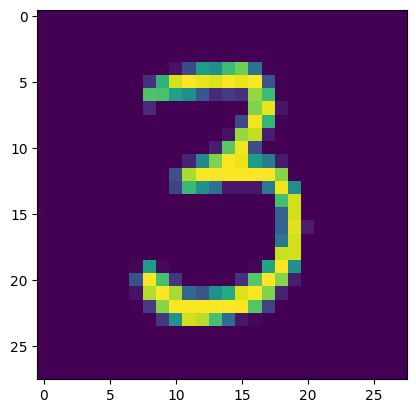

2


In [ ]:
plt.imshow(X_train[50])
plt.show()

#Print the Corresponding Label
print(y_train[25])

### **Image Labels**

In [ ]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [ ]:
#Unique Values in y_train
print(np.unique(y_train))


#unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


**We can use these labels as such (or) we can also apply One Hot Encoding**

#### **All the images have the same Dimesnions in this Dataset, if not we have to resize all the images to a common dimesnsion**

In [ ]:
##Scaling the values
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
# 0/255 = 0
# 255/255 = 0

X_train_scaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### **Bulding the Neural Network**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy,sparse_categorical_crossentropy


In [ ]:
## Setting up the layers of the neural network

## Here,now we use the normal neural network
model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(50,activation = 'relu'),
    Dense(50,activation ='relu'),
    Dense(10,activation = 'sigmoid')

])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 50)                39250     
                                                                 
 dense_22 (Dense)            (None, 50)                2550      
                                                                 
 dense_23 (Dense)            (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

#Compile the neural network
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [ ]:
#Trainig the Neural Network
model.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7515 - accuracy: 0.8149
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4017 - accuracy: 0.8938
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3159 - accuracy: 0.9154
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2701 - accuracy: 0.9296
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2378 - accuracy: 0.9377
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2091 - accuracy: 0.9443
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1839 - accuracy: 0.9496
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1641 - accuracy: 0.9547
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1493 - accuracy: 0.9571
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.139

- Train Data Accuracy - 95.06%

**Accuracy on Test Data**
- To check for the whether is underfit or not

In [ ]:
#Evalute the Data
loss,accuracy = model.evaluate(X_test,y_test)
print(accuracy)
print(loss)


313/313 [==============================] - 1s 3ms/step - loss: 0.1962 - accuracy: 0.9528
0.9527999758720398
0.19621260464191437


- Test Data Accuracy  = 94.4%
- It is not overfit ,and oredict the output 94.4% accurate

In [ ]:
print(X_test.shape)

(10000, 28, 28)


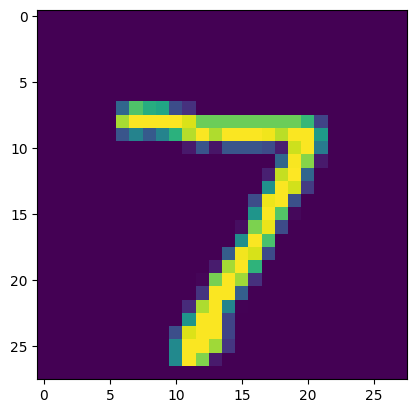

In [ ]:
#First Data point in X_test
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(y_test[0])

7


In [ ]:
### Predict the Model
y_pred = model.predict(X_test)
print(y_pred.shape)

313/313 [==============================] - 1s 2ms/step
(10000, 10)


In [ ]:
print(y_pred[0])  ##It gives the probality of  number [ 0 to  9 ]
#here, it is  7 -> so for this it has 9.99% Prob value

[0.00855741 0.9864184  0.98961663 0.9976859  0.82381594 0.9234907
 0.01162967 0.9999993  0.0471582  0.95919126]


**Model Predict() Gives the Predict Probability of the Each Class  for the DataPoint**

In [ ]:
##Convert the Preiction probability to class label
y_pred_label = [np.argmax(y_pred[0])]
print(y_pred_label)
## the index 7 has high probalility value..

[7]


**Converting the Prediction Probabilty to class label for all test data points**

In [ ]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 4, 0, 6, 4, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 1, 0, 1, 3, 1, 3, 4, 7, 1, 7, 1, 3, 1, 1, 7, 4, 1, 3, 5, 1, 1, 1, 4, 0, 3, 5, 5, 6, 0, 4, 1, 4, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 1, 7, 1, 4, 7, 3, 0, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 3, 6, 0, 5, 4, 9, 9, 2, 1, 4, 2, 8, 1, 3, 4, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 4, 4, 5, 5, 0, 5, 6, 0, 5, 7, 1, 1, 0, 1, 0, 4, 0, 7, 3, 1, 7, 1, 1, 1, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 0, 5, 4, 6, 5, 1, 5, 1, 4, 4, 7, 1, 3, 1, 9, 1, 8, 1, 0, 1, 0, 5, 0, 8, 4, 1, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 0, 1, 1, 3, 0, 1, 1, 1, 3, 3, 5, 1, 4, 4, 7, 9, 3, 4, 0, 3, 6, 5, 5, 7, 2, 1, 7, 1, 2, 1, 4, 1, 7, 3, 3, 8, 8, 7, 9, 1, 1, 4, 1, 5, 8, 1, 7, 2, 3, 0, 6, 4, 2, 4, 1, 3, 5, 7, 7, 2, 8, 1, 0, 0, 5, 7, 7, 9, 1, 8, 1, 1, 0, 3, 0, 1, 9, 9, 1, 1, 1, 2, 1, 2, 3, 7, 5, 9, 1, 6, 4, 1, 5, 8, 1, 4, 1, 0, 4, 0, 0, 1, 8, 0, 7, 1, 7, 4, 0, 1, 7, 1, 3, 3, 0, 0, 3, 1, 9, 0, 3, 2, 5, 9, 7, 3, 3, 0, 4, 2, 0, 7, 1, 1, 1, 1, 

In [ ]:
print(y_pred)

[[8.5574118e-03 9.8641843e-01 9.8961663e-01 ... 9.9999928e-01
  4.7158204e-02 9.5919126e-01]
 [9.8467571e-01 9.9998403e-01 1.0000000e+00 ... 9.9944395e-01
  9.9995375e-01 1.5304531e-01]
 [1.6514704e-02 1.0000000e+00 2.1704881e-11 ... 5.3170723e-12
  1.0298687e-01 2.1164028e-01]
 ...
 [2.8064287e-06 9.9999988e-01 9.9998629e-01 ... 9.9991238e-01
  9.9119747e-01 9.9999988e-01]
 [6.1190990e-11 5.9033500e-04 2.9362250e-09 ... 7.5225583e-03
  9.9999356e-01 2.5839690e-13]
 [1.0000000e+00 9.9959642e-01 1.0000000e+00 ... 2.3383755e-04
  1.0000000e+00 9.9999988e-01]]


- y_test ---> True Labels


- y_pred ---> Predicted Labels

### **Confusion Matrix**

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 944    1   12    3    1    9    3    3    4    0]
 [  10 1114    1    5    0    2    0    0    3    0]
 [  48  595  350    7    3    4    1   11   11    2]
 [   1   14    9  954    2   11    1    5    9    4]
 [  10   80   19    1  850    0    4    2    2   14]
 [   5    1    1   35    2  822    3    2   16    5]
 [ 499    4    1    0   23   32  382    1   15    1]
 [   1   16   17    3    6    4    0  962    1   18]
 [ 219  264    6   28    6    9    1    2  436    3]
 [   4   11    0  126  212    2    1   30   13  610]], shape=(10, 10), dtype=int32)


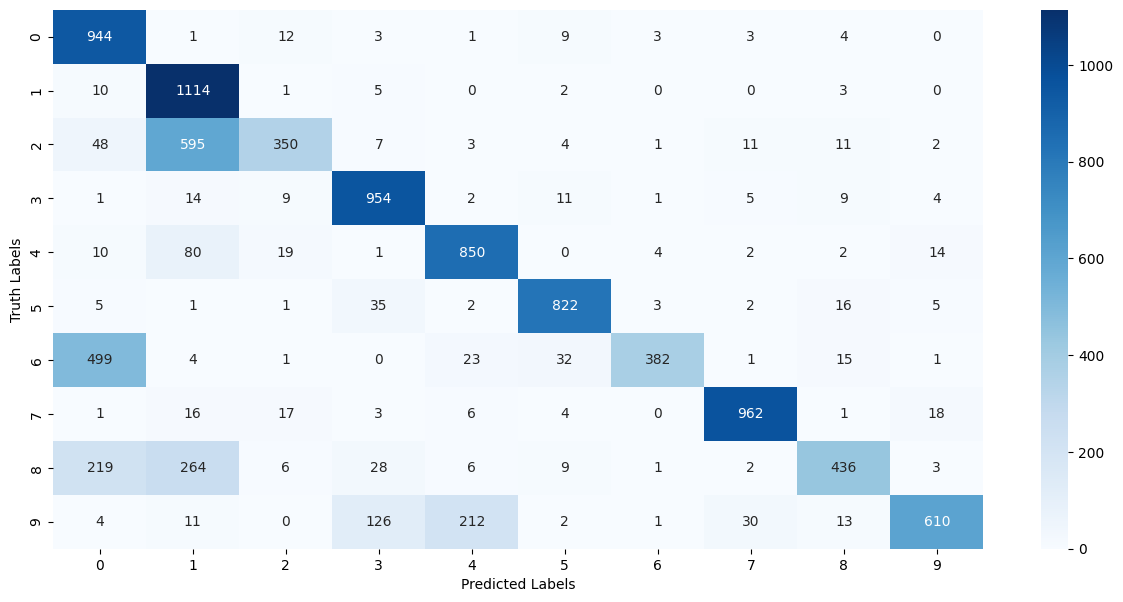

In [ ]:
## Build - Heat Map with all these values
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat,annot = True,fmt = 'd',cmap = 'Blues') #fmt = 'd'-->intgers
plt.xlabel('Predicted Labels')
plt.ylabel('Truth Labels')
plt.show()

In [ ]:
##there are 960 image sof 0 predicted as 0
##there are 0 images of 0 ,predicted as the 1
##there are 2 images of 0 ,predicted as the 2
##there are 2 images of 0 ,predicted as the 3

**### Bulid the Predicted System**

In [ ]:
input_img_path  = '/content/mnist_img_4.png'
input_img = cv2.imread(input_img_path)


In [ ]:
type(input_img)

numpy.ndarray

In [ ]:
print(input_img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [ ]:
type(input_img)

numpy.ndarray

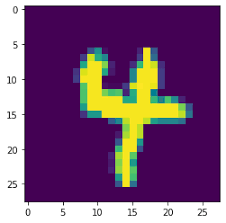

In [ ]:
cv2_imshow(input_img)

In [ ]:
input_img.shape

(223, 226, 3)

In [ ]:
##it has converted into the grayscale img
grayscale = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)
grayscale.shape


(223, 226)

In [ ]:
input_img_resize = cv2.resize(grayscale,(28,28))
input_img_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_img_resize)  ##the size is changed to (28,28)

In [ ]:
input_img_resize = input_img_resize/255

In [ ]:
type(input_img_resize)

numpy.ndarray

In [ ]:
image_reshaped = np.reshape(input_img_resize,[1,28,28])  #reashpe into into 1 D-arraty


In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 57ms/step
[[0.5675377  0.32550788 0.45863128 0.39686847 0.5741537  0.39382726
  0.43524268 0.6251934  0.5651801  0.65204   ]]


In [ ]:
##Find the argmax of input_pred
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

9


### **The Predictive System**

In [ ]:
input_image_path = input('Path of input image ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)


input_image_resize = cv2.resize(grayscale,(28,28))

input_image_resize = input_image_resize/255


input_img_reshaped = np.reshape(input_image_resize,[1,28,28])

input_prediction = model.predict(input_img_reshaped )

print('The Handwritten Digit is Recognized as :-',input_pred_label)


